In [1]:
cd /pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis/

/pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis


In [18]:
import pickle
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import json
import gc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
data_path = 'Data/sepsis_removed_0.pkl'
pkl = pickle.load(open(data_path, 'rb'))
data = pkl[0]
oc = pkl[1]
train_ind = pkl[2]
valid_ind = pkl[3]
test_ind = pkl[4]
del pkl

In [ ]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_inds = pos_oc['ts_ind'].to_list()

In [4]:
data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.000000,1.000000
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.000000,1.000000
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.000000,1.000000
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.000000,1.000000
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.000000,1.000000
...,...,...,...,...,...,...,...
82886223,57281,20.400000,MBP,0.195381,chart,78.552377,17.645628
82886224,57281,20.400000,O2 Saturation,-0.678068,chart,96.820961,4.160290
82886225,57281,20.400000,RR,0.179866,chart,26.278501,15.130729
82886226,57281,20.400000,SBP,-0.404061,chart,120.239648,25.341836


In [7]:
text_data = data[data.variable == 'Text']
text_data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.0,1.0
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.0,1.0
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


In [10]:
text_data.sort_values(['ts_ind', 'hour'])

,ts_ind,hour,variable,value,TABLE,mean,std
638818,0,5.683333,Text,rn progress note\nneuro; pt aox3 pt affect slo...,noteevents,1.0,1.0
453442,0,9.066667,Text,[**2198-2-15**] 8:32 AM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
453932,0,11.133333,Text,[**2198-2-15**] 10:36 AM\n CHEST (PORTABLE AP)...,noteevents,1.0,1.0
453987,0,15.666667,Text,[**2198-2-15**] 3:08 PM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
638069,0,18.933333,Text,RESP: PT. INTUBATED AFTER SEVERAL ATTEMPT AT N...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
742243,57280,16.966667,Text,TRANSFER NOTE FROM N-SICU\nD: 80 YR OLD RETIRE...,noteevents,1.0,1.0
675206,57281,1.000000,Text,Mr. [**Known lastname 829**] is a 60 yr gentle...,noteevents,1.0,1.0
17469,57281,5.400000,Text,PATIENT/TEST INFORMATION:\nIndication: Coronar...,noteevents,1.0,1.0
675207,57281,9.300000,Text,"CCU NPN 1900-0700\nS: "" Can I go home tomorrow...",noteevents,1.0,1.0


In [5]:
oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
1,1,188028,270,0
2,2,173727,271,0
3,3,164716,272,0
4,4,158689,273,0
...,...,...,...,...
57376,45558,143774,94944,0
57377,45559,123750,94950,0
57378,50487,196881,94953,0
57379,45560,118475,94954,0


In [6]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
8,7,192224,279,1
25,48221,179726,292,1
43,31,194340,305,1
68,52,172132,329,1
...,...,...,...,...
57274,45480,187410,90658,1
57311,45509,133967,91950,1
57343,45536,116543,94828,1
57347,45540,133042,94846,1


In [ ]:
pos_inds = pos_oc['ts_ind'].to_list()
pos_inds

## 24-h

In [14]:
text_data_24 = text_data[text_data.hour <= 24].reset_index()
text_data_24

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
1,9,55730,17.083333,Text,Admission Date: [**2194-8-15**] ...,noteevents,1.0,1.0
2,11,4140,19.600000,Text,Admission Date: [**2193-5-30**] Dischar...,noteevents,1.0,1.0
3,17,50150,12.716667,Text,Admission Date: [**2157-5-31**] ...,noteevents,1.0,1.0
4,25,30691,19.716667,Text,Admission Date: [**2118-7-10**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
316730,1407409,30881,8.983333,Text,NPN\nplease see above note for delivery histor...,noteevents,1.0,1.0
316731,1407410,30881,16.483333,Text,NPN 11p-7a\n\n\n#1 Infant placed to RA @ shift...,noteevents,1.0,1.0
316732,1407411,30881,21.233333,Text,"NNP PE\n\nResp: Comfortable effort, BS clear a...",noteevents,1.0,1.0
316733,1407422,29375,0.700000,Text,NICU Attending Admission Note\nPt is a 34 [**6...,noteevents,1.0,1.0


In [ ]:
texts_24 = " ".join(text for text in text_data_24.value)

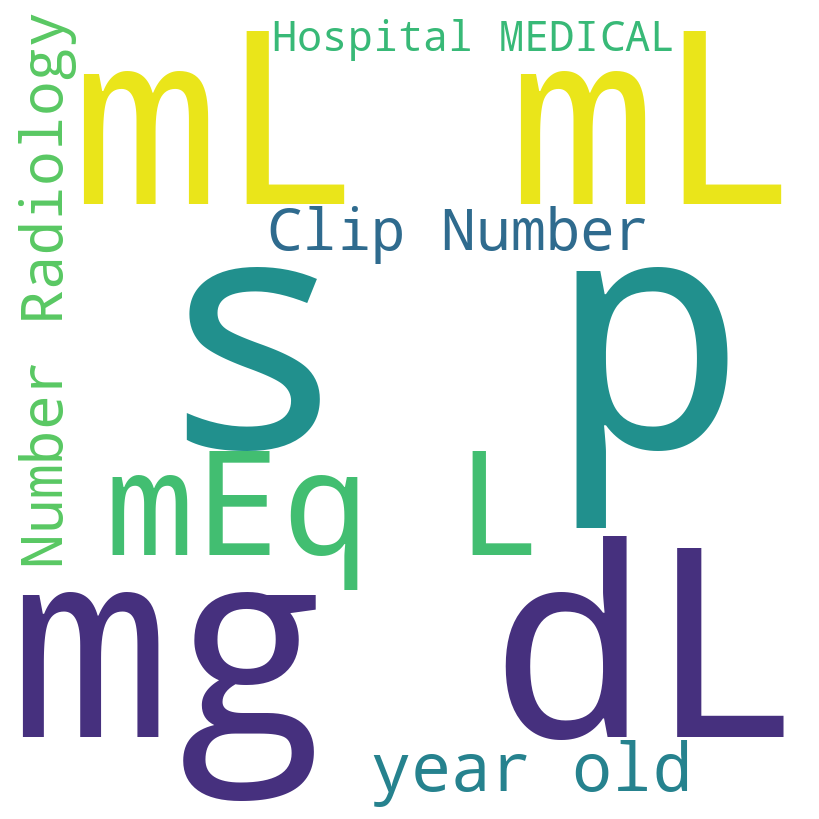

In [25]:
stopwords = set(STOPWORDS)
stopwords.add('-')
stopwords.add('Name')
stopwords.add('lastname')
stopwords.add('Last Name')
stopwords.add('First Name')
stopwords.add('patient')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(texts_24)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('hate_wordclouds.png')

In [26]:
text_data_24[text_data_24['ts_ind'].isin(pos_inds)]

,index,ts_ind,hour,variable,value,TABLE,mean,std
11,55,46328,1.866667,Text,Admission Date: [**2136-5-25**] ...,noteevents,1.0,1.0
13,60,48934,5.466667,Text,Admission Date: [**2120-11-15**] ...,noteevents,1.0,1.0
17,66,46792,4.866667,Text,Admission Date: [**2164-6-24**] ...,noteevents,1.0,1.0
23,103,52260,4.983333,Text,Admission Date: [**2123-8-15**] ...,noteevents,1.0,1.0
24,107,55319,9.333333,Text,Admission Date: [**2130-10-23**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
314622,1390589,31741,17.350000,Text,Chief Complaint:\n 24 Hour Events:\n 2 uni...,noteevents,1.0,1.0
314629,1390627,29252,15.883333,Text,Chief Complaint:\n 24 Hour Events:\n Dopa ...,noteevents,1.0,1.0
314670,1390834,34681,5.766667,Text,Subjective\n Pt intubated\n Objective\n ...,noteevents,1.0,1.0
314687,1390924,26449,21.116667,Text,"TITLE:\n Chief Complaint: cough, malaise, hy...",noteevents,1.0,1.0


In [27]:
text_data_24[~text_data_24['ts_ind'].isin(pos_inds)]

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
1,9,55730,17.083333,Text,Admission Date: [**2194-8-15**] ...,noteevents,1.0,1.0
2,11,4140,19.600000,Text,Admission Date: [**2193-5-30**] Dischar...,noteevents,1.0,1.0
3,17,50150,12.716667,Text,Admission Date: [**2157-5-31**] ...,noteevents,1.0,1.0
4,25,30691,19.716667,Text,Admission Date: [**2118-7-10**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
316730,1407409,30881,8.983333,Text,NPN\nplease see above note for delivery histor...,noteevents,1.0,1.0
316731,1407410,30881,16.483333,Text,NPN 11p-7a\n\n\n#1 Infant placed to RA @ shift...,noteevents,1.0,1.0
316732,1407411,30881,21.233333,Text,"NNP PE\n\nResp: Comfortable effort, BS clear a...",noteevents,1.0,1.0
316733,1407422,29375,0.700000,Text,NICU Attending Admission Note\nPt is a 34 [**6...,noteevents,1.0,1.0


In [28]:
281293 + 35442

316735

## 120-h

In [7]:
len(train_ind)

36551

In [8]:
len(set(train_ind))

36551

In [14]:
len(set(valid_ind))

9262

In [15]:
len(set(test_ind))

11469

In [16]:
36551+9262+11469

57282

In [12]:
len(set(data['ts_ind'].to_list()))

57282

In [13]:
len(set(oc['ts_ind'].to_list()))

57282

In [6]:
oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
1,1,188028,270,0
2,2,173727,271,0
3,3,164716,272,0
4,4,158689,273,0
...,...,...,...,...
57376,45558,143774,94944,0
57377,45559,123750,94950,0
57378,50487,196881,94953,0
57379,45560,118475,94954,0


In [17]:
data_inds = data['ts_ind'].to_list()
oc_inds = oc['ts_ind'].to_list()

In [18]:
set(data_inds) == set(oc_inds)

True

In [25]:
set(train_ind) <= set(oc_inds)

True

In [26]:
set(valid_ind) <= set(oc_inds)

True

In [27]:
set(test_ind) <= set(oc_inds)

True

In [29]:
set(train_ind) | set(valid_ind) | set(test_ind) == set(oc_inds)

True

In [30]:
set.intersection(set(train_ind), set(valid_ind), set(test_ind))

set()

In [31]:
set.intersection(set(train_ind), set(valid_ind))

set()

In [32]:
set.intersection(set(valid_ind), set(test_ind))

set()

In [33]:
set.intersection(set(train_ind), set(test_ind))

set()

## POS

In [38]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 21.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
all_text = " ".join(text for text in data.value[:100000])

In [44]:
# all_text

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.add('Last')
stopwords.add('Last Name')
stopwords.add('First Name')
stopwords.add('patient')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('hate_wordclouds.png')

In [ ]:
# words = ''
# stopwords = set(STOPWORDS)
# stopwords.add('https')
# stopwords.add('co')
# stopwords.add('amp')

# pos_tweets = df[df['OR_hate']==1].tweet

# # iterate through the csv file
# for pos_tweet in pos_tweets:
     
#     # typecaste each val to string
#     pos_tweet = str(pos_tweet)

#     # preprocess
#     pos_tweets = preprocess_tweet(pos_tweet, lang='en')

#     # split the value
#     tokens = pos_tweet.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(words)
 
# # plot the WordCloud image                      
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# # plt.savefig('hate_wordclouds.png')